
## II-Contrast enhancement and image filtering

**Objectives:**  
* Learn how to calculate and plot the histogram of images.  
* Implement and apply contrast enhancement using histogram equalization.

In [2]:
# import all packages that will be used in Assignment II
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Assignment II.1: Contrast enhancement

In this assignment, we will have a low contrast image as an input. We will apply different techniques to enhance the contrast of the image and compare their outputs.

#### A.

Read the image file 'data/dog.png' and convert it to gray_scale.

**Answer:**  

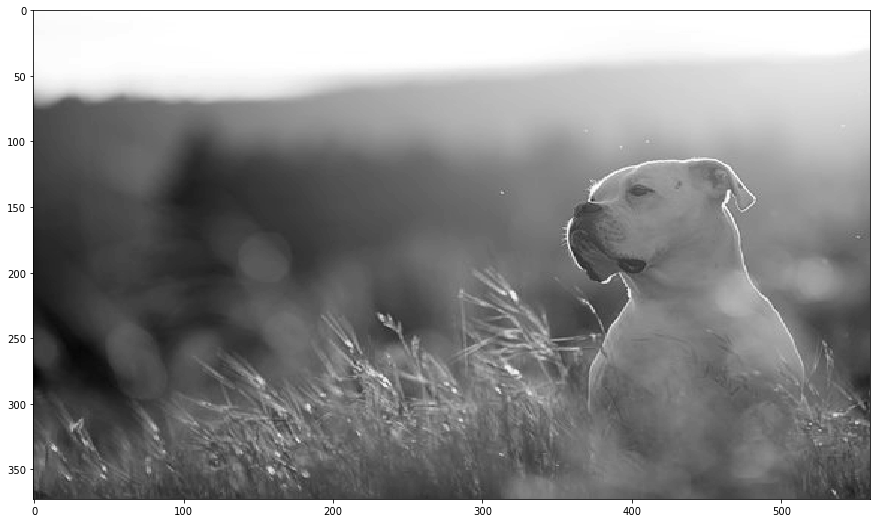

In [3]:
dog = cv2.imread('data/dog.png',cv2.IMREAD_COLOR)
dog1 = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
im_gray = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,9))
plt.imshow(im_gray, cmap='gray', interpolation='nearest', aspect='auto')
plt.show()

#### B.

Compute the histogram of gray_scale image using the command **np.histogram(im_gray.ravel())** and then plot the resulting histogram with **plt.hist(im_gray.ravel())** and **plt.show()**.

*Hint:* There are other parameters in **np.histogram** and **plt.hist**.

**Answer:**  

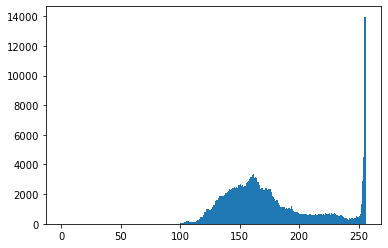

In [4]:
plt.hist(im_gray.ravel(),256,[0,256])
hist = np.histogram(im_gray.ravel(), bins=256, range=(0,256))
plt.show()

What is the most probable gray_scale value?

*Hint:*  
1. **np.where**  
2. **np.max**

**Answer:**  

In [5]:
print(hist[1][np.where(hist[0] == np.max(hist[0]))][0])

255.0


#### C.

Contrast enhancement is one of the first image processing techniques that we use. Implement the linear transform gray_scale stretching presented in the slides and then view the resulting image.  
What do you observe (w.r.t quality)?

**Answer:**  

(373, 560)


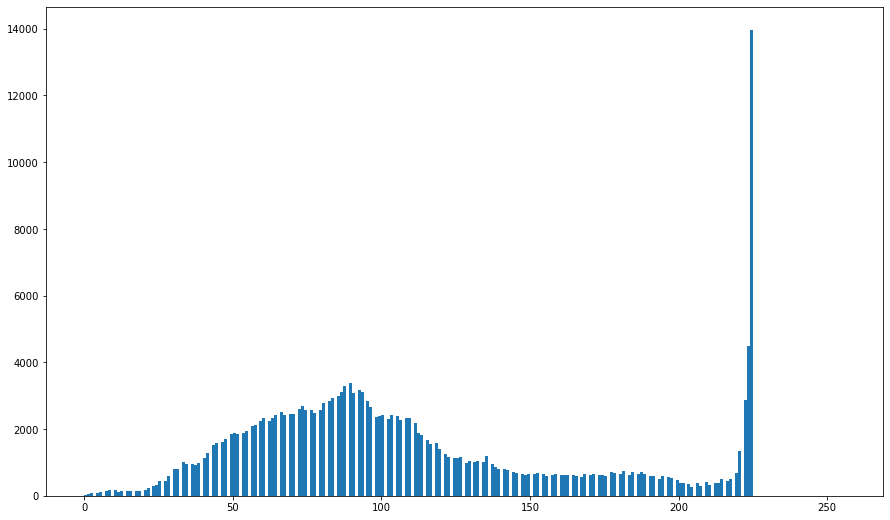

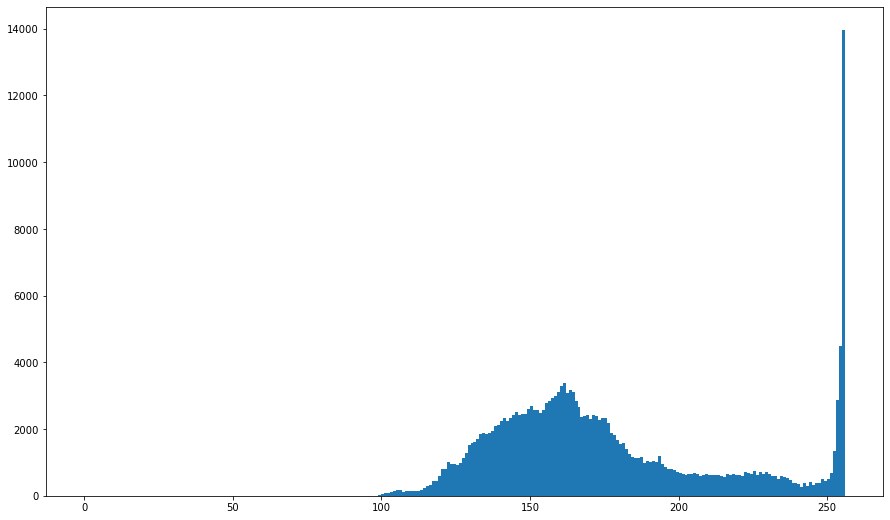

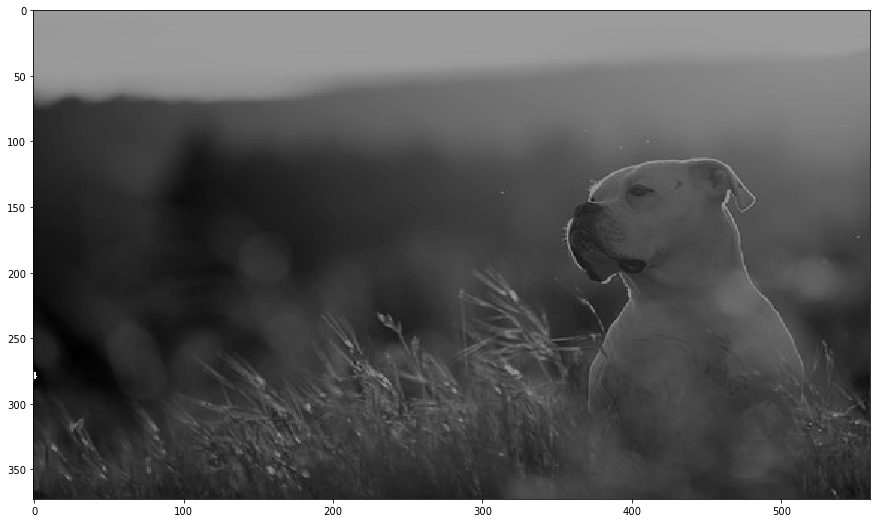

In [6]:
mean = np.mean(im_gray.ravel())

gray_hist = np.histogram(im_gray, bins=256, range=(0,256))


transform = (255/mean)*(im_gray-99)


stretch_hist = np.histogram(transform.ravel(), bins=256, range=(0,256))


print(im_gray.shape)

plt.figure(figsize=(15,9))
plt.hist(transform.ravel(),256,[0,256])
plt.show()

plt.figure(figsize=(15,9))
plt.hist(im_gray.ravel(),256,[0,256])
plt.show()


plt.figure(figsize=(15,9))
plt.imshow(transform, cmap='gray', interpolation='nearest', aspect='auto')
plt.show()

#### D.

Another contrast stretching technique is the histogram equalization. Implement the histogram equalization and apply it to the gray_scale image and show the output image after applying the equalization. Compare the result with the output of part C, what do you observe?

*Hint:*  
1. **hist.cumsum()**  
2. **numpy.ma**: **numpy.ma.masked_equal** and **numpy.ma.filled**

**Answer:**  

1.0


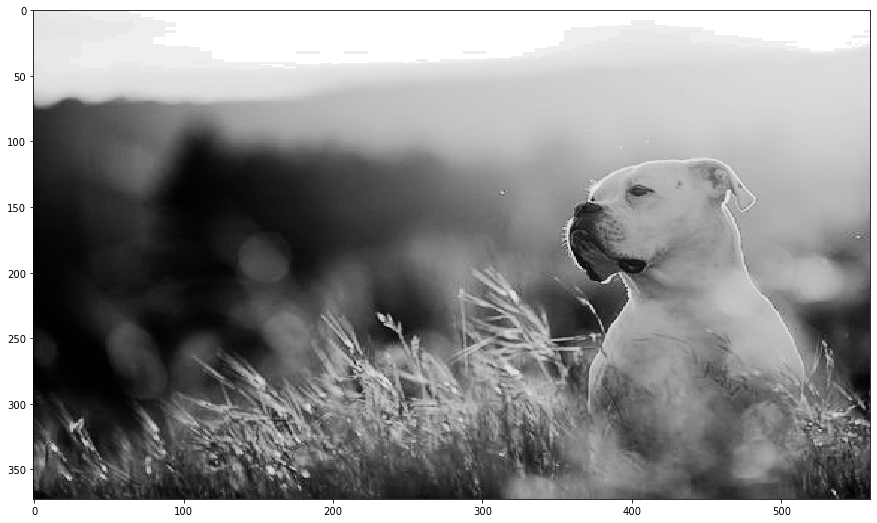

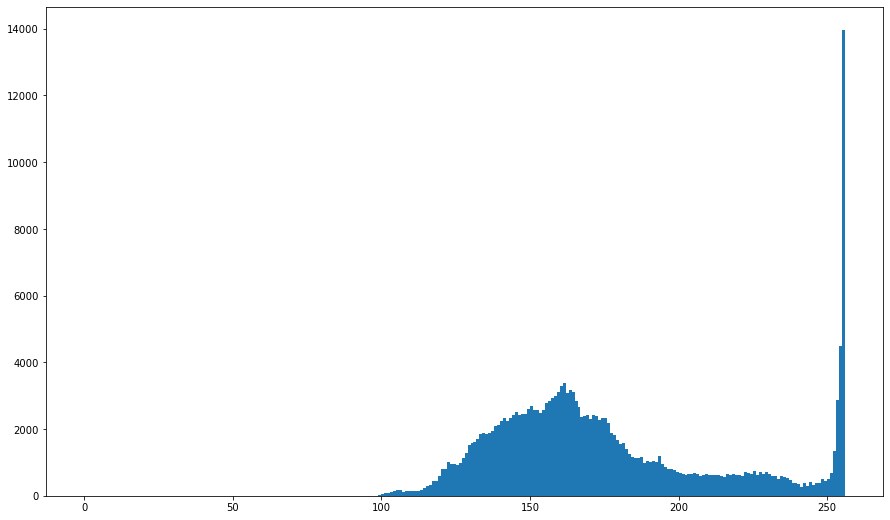

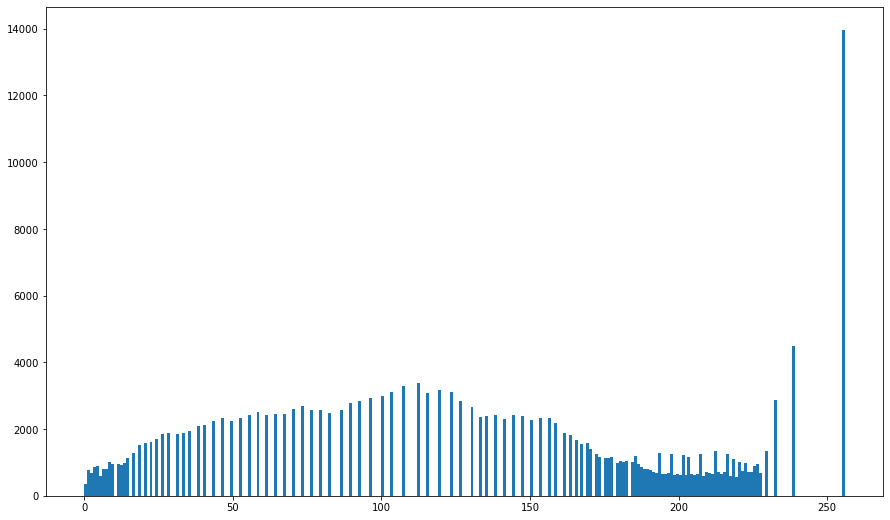

In [7]:
hist, bins = np.histogram(im_gray.ravel(), bins=256, range=(0,256))
comulative = hist.cumsum() / (373*560);
equalized = im_gray
print(comulative[255])
for i in range(0, 256):
    ma = np.ma.masked_equal(equalized, value=i)
    equalized = np.ma.filled(ma, fill_value=np.round(comulative[i]*255,0))

plt.figure(figsize=(15,9))
plt.imshow(equalized, cmap='gray', interpolation='nearest', aspect='auto')
plt.show()

plt.figure(figsize=(15,9))
plt.hist(im_gray.ravel(),256,[0,256])
plt.show()

plt.figure(figsize=(15,9))
plt.hist(equalized.ravel(),256, (0,256))
plt.show()

The **cv2.equalizeHist(im_gray)** is a function in OpenCV package that calculates the equalized histogram of an image. Apply that to the gray_scale image, then compare the output histogram with your implemented histogram equalizer output of part D, are they exactly equal?

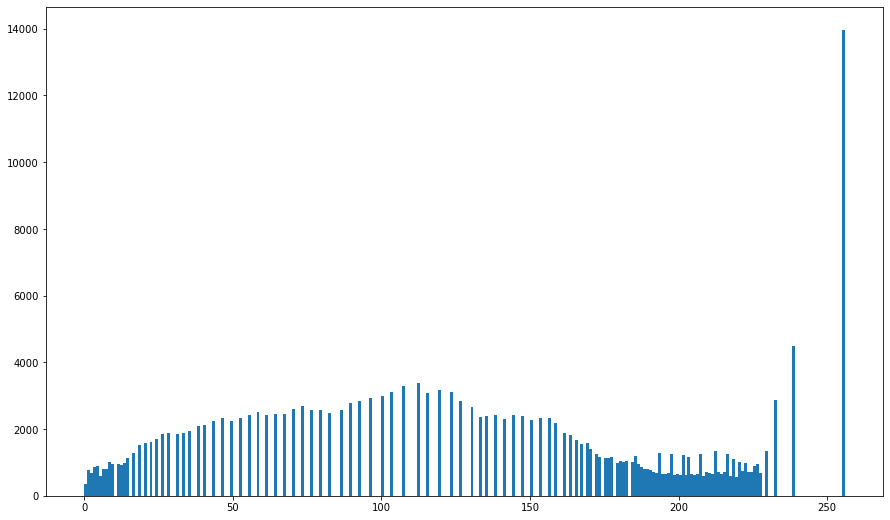

In [8]:
plt.figure(figsize=(15,9))
plt.hist(cv2.equalizeHist(im_gray).ravel(),256, (0,256))
plt.show()

**Answer:**  

### Assignment II.2: Filtering

In this assignment we will see input images with different un-wanted noise effect added to them. The task is to define what type of noise is present in the image and apply an effective corresponding filter to filter it out.

#### A.

Read the image file 'data/Zebra_noisy.png' and convert it to gray_scale if needed and view it.

**Answer:**  

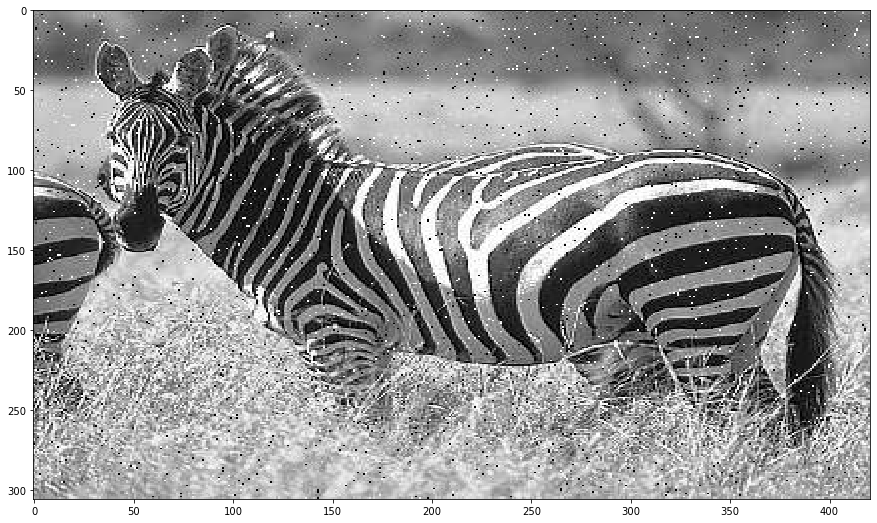

In [9]:
zebra = cv2.imread('data/Zebra_noisy.png',cv2.IMREAD_COLOR)
im_gray = cv2.cvtColor(zebra, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,9))
plt.imshow(im_gray, cmap='gray', interpolation='nearest', aspect='auto')
plt.show()

What type of noise is present in the image?

#### B.

Apply a moving neighborhood average filter of size 3\*3 on the noisy image by using the function **cv2.blur(im,(w,h))**, view the result. Try the same filter with a size of 5\*5 and 7\*7, what is your conclusion? 

**Answer:**  

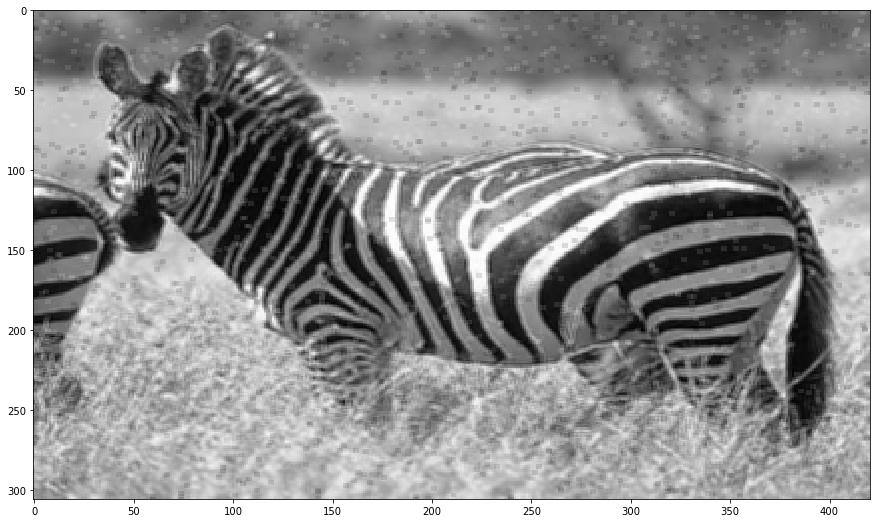

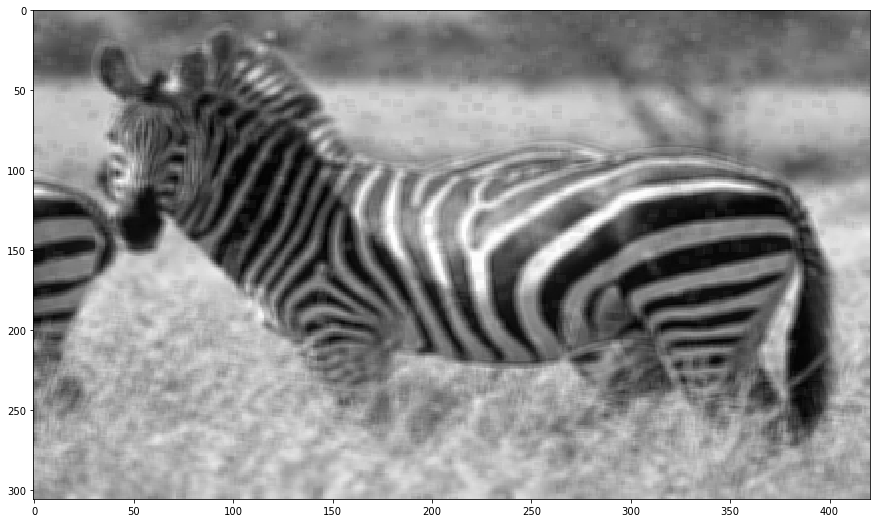

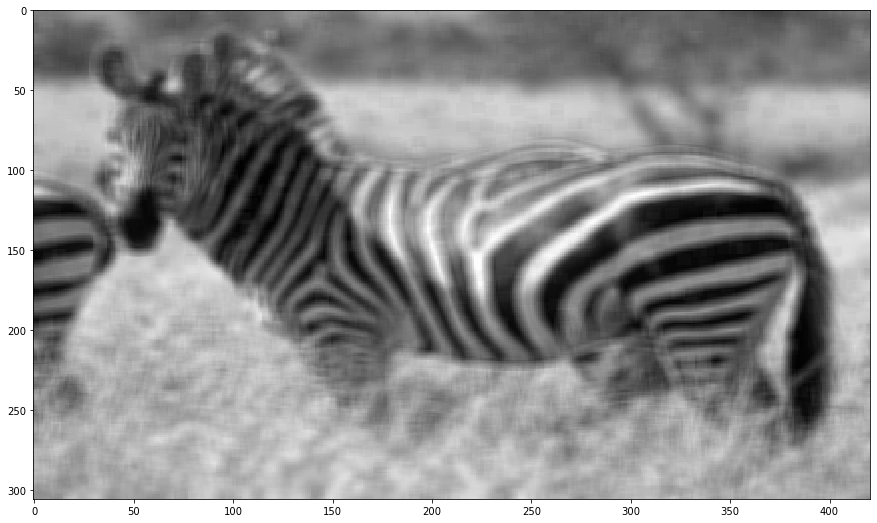

In [10]:
three = cv2.blur(im_gray,(3,3))
plt.figure(figsize=(15,9))
plt.imshow(three, cmap='gray', interpolation='nearest', aspect='auto')
plt.show()
five = cv2.blur(im_gray,(5,5))
plt.figure(figsize=(15,9))
plt.imshow(five, cmap='gray', interpolation='nearest', aspect='auto')
plt.show()
seven = cv2.blur(im_gray,(7,7))
plt.figure(figsize=(15,9))
plt.imshow(seven, cmap='gray', interpolation='nearest', aspect='auto')
plt.show()

What happens to the quality of the edges in the image? What happens to the noise?

#### C.

The **median filter** is a nonlinear digital filtering technique, often used to remove noise from an image or signal. The main idea of the median filter is to run through the signal entry by entry, replacing each entry with the mdeian of neighboring entries. The pattern of neighbors is called the "window", which slides, entry by entry, over the entire signal. Implement3\*3 median filter, compare the result with the output result of the moving neighborhood average filter of size 3\*3. What is your conclusion?

**Answer:**  

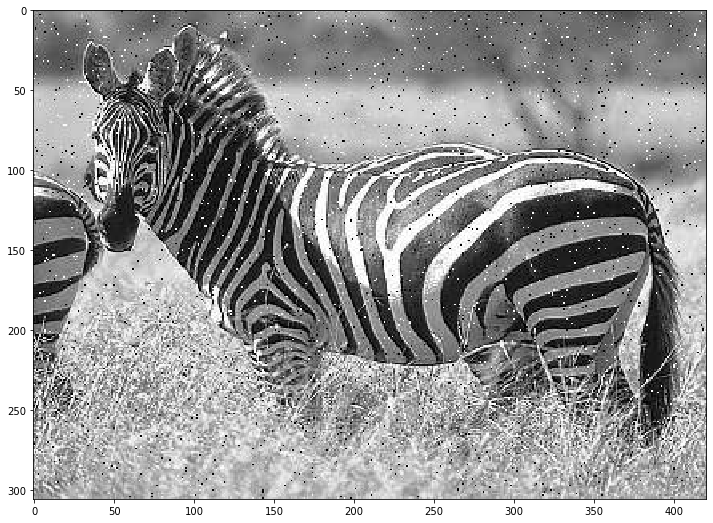

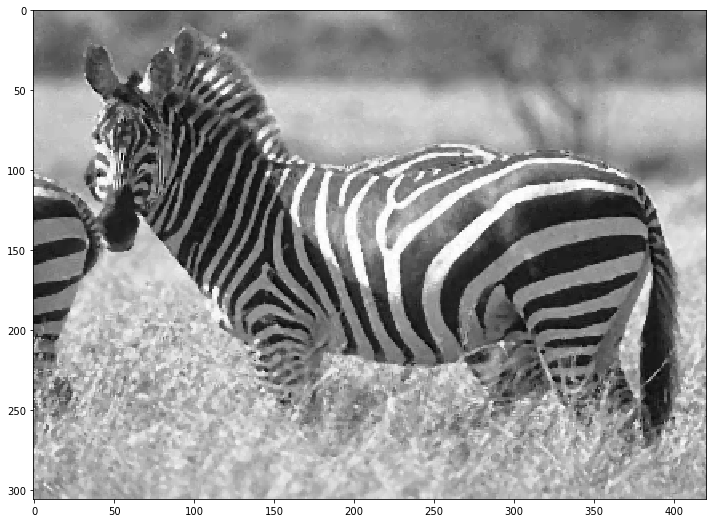

In [16]:
im_gray_median = cv2.medianBlur(im_gray, 3)
plt.figure(figsize=(15,9))
plt.imshow(im_gray, cmap='gray')
plt.show()
plt.figure(figsize=(15,9))
plt.imshow(im_gray_median, cmap='gray')
plt.show()
def show(image):
    plt.figure(figsize=(15,9))
    plt.imshow(image, cmap='gray')
    plt.show()
    
def showrgb(image):
    plt.figure(figsize=(15,9))
    plt.imshow(image)
    plt.show()

### Assignment II.3: Image-sharping filter

#### A.

Steps to be done:  
1. Read the input image 'data/gira_lc.png', convert it to gray_scale if needed, view the image.  
2. Apply the histogram equallization to enhance the image contrast.  
3. Create a 3\*3 image sharping filter (mask/kernel) from the slides.  
4. Apply the image-sharping filter to the output image from step 2.  
5. View the output image.

**Answer:**  

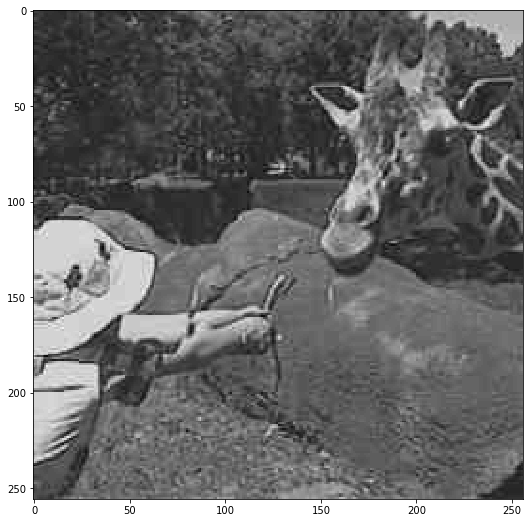

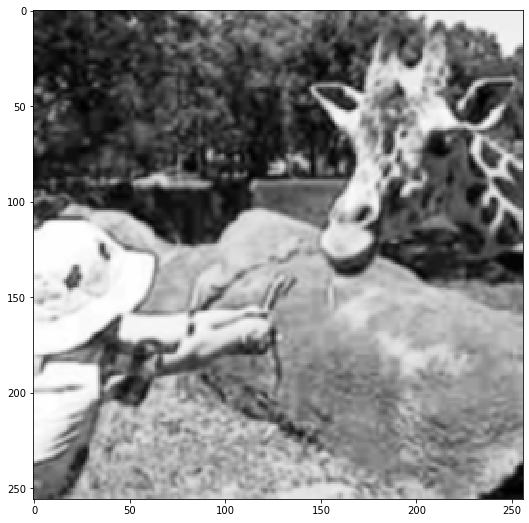

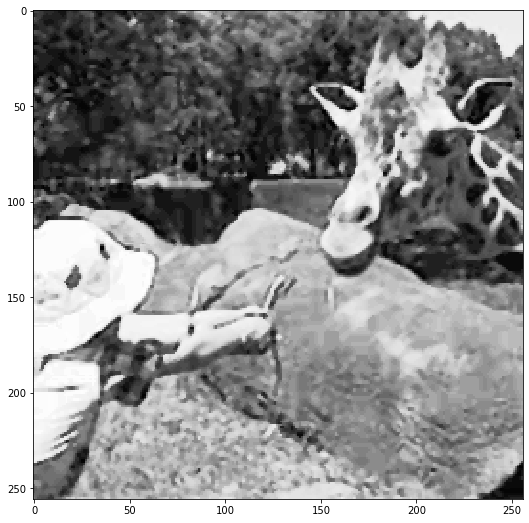

In [32]:
im = cv2.imread('data/gira_lc.png',cv2.IMREAD_COLOR)
im_gray= cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

im_eq = cv2.equalizeHist(im_gray)
kernel_3x3 = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        kernel_3x3[i][j] = (1/(2 *np.pi*1))*np.exp(-(pow((i-2),2)+pow((j-2),2))/2)

kernel_3x3= kernel_3x3*(1/kernel_3x3.sum())
im_filter = cv2.filter2D(im_eq, -1, kernel_3x3)
im_median = cv2.medianBlur(im_eq, 3)
im_filter_median  = cv2.filter2D(im_median, -1, kernel_3x3)
show(im_gray)
show(im_filter)
show(im_median)